Iterate through each file in the directory to pull out the times and labels of each respiratory cycle. Perform a STFT transform to obtain spectrogram and convert image to data array

In [1]:
import matplotlib.pyplot as plt
from scipy.io import wavfile
import numpy as np
import wavio
import matplotlib.ticker as ticker
from PIL import Image
import cv2
import pandas as pd
import os
from pydub import AudioSegment
from scipy import signal
from matplotlib.pyplot import figure


directory_in_str = "/home/billy/Desktop/LittC2SE"
directory = os.fsencode(directory_in_str)

#Create empty vectors to hold labels

Data = []
time_start = []
time_end = []
Crackle_Label = []
Wheeze_Label = []

z = 0
#Iterate over entire directory in folder
for file in sorted(os.listdir(directory)):
     filename = os.fsdecode(file)
     if filename.endswith(".txt"):
             fo = open(filename)
             lines = [line.split() for line in fo]
             time_s =  [word[0] for word in lines]
             time_e = [word[1] for word in lines]
             crackles = ([word[2] for word in lines])
             wheezes = [word[3] for word in lines] 
            
             #Create Labels for crackles/wheezes
             for x in crackles: 
                if (int(x) == 1):
                    Crackle_Label.append(1)
                elif (int(x) == 0):
                    Crackle_Label.append(0)
                    
             for y in wheezes: 
                if (int(y) == 1):
                    Wheeze_Label.append(1)
                elif (int(y) == 0):
                    Wheeze_Label.append(0)
            
             #Each iteration add values to array   
             time_start.append(time_s)
             time_end.append(time_e)
            
            
     if filename.endswith(".wav"):
        length = len(time_s)
        Wav_File = AudioSegment.from_wav(filename)
        for i in range(length):
            
            #Split .wav file by each time segment
            t1 = float(time_s[i]) * 1000
            t2 = float(time_e[i]) * 1000
            newAudio = Wav_File[t1:t2]
            newAudio.export('Audio' + str(i) + '.wav', format="wav")
           
            #Set size of figure to 1x1 inch (100x100 pixels)
            figure(num=None, figsize=(1, 1), dpi=100, facecolor='w', edgecolor='k')

            #Read audio file
            sample_rate, samples = wavfile.read('Audio' + str(i) + '.wav')
            
            #Spectrogram of audio file
            frequencies, times, spectrogram = signal.spectrogram(samples, sample_rate, nfft=512, noverlap=128)

            #Only display frequencies from 0 to 3 kHz
            spectrogram = spectrogram[(frequencies >= 0) & (frequencies <= 3000)]
            frequencies = frequencies[(frequencies >= 0) & (frequencies <= 3000)]

            #Plot spectrogram
            plt.pcolormesh(times, frequencies, 10*np.log10(spectrogram))


            #Remove all axis/borders
            plt.gca().set_axis_off()
            plt.subplots_adjust(top = 1, bottom = 0, right = 1, left = 0, hspace = 0, wspace = 0)
            plt.margins(0,0)
            plt.gca().xaxis.set_major_locator(ticker.NullLocator())
            plt.gca().yaxis.set_major_locator(ticker.NullLocator())

            #Save Spectrogram image as .png file
            plt.savefig('Spectrogram' + str(i) +'.png')
        
            #Add image data as greyscale into vector
            image_data = cv2.imread('Spectrogram' + str(i) +'.png',1)
            Data.append(image_data)
        
            #Remove audio/image files
            os.remove('Audio' + str(i) + '.wav')
            os.remove('Spectrogram' + str(i) +'.png')
        
            #Close all plots
            plt.close('all')
            print('Complete entry: ' + str(z))
            z = z + 1
    


/home/billy/anaconda3/lib/python3.7/site-packages/pydub/utils.py:165: RuntimeWarning: Couldn't find ffmpeg or avconv - defaulting to ffmpeg, but may not work
  warn("Couldn't find ffmpeg or avconv - defaulting to ffmpeg, but may not work", RuntimeWarning)


Complete entry: 0
Complete entry: 1
Complete entry: 2
Complete entry: 3
Complete entry: 4
Complete entry: 5
Complete entry: 6
Complete entry: 7
Complete entry: 8
Complete entry: 9
Complete entry: 10
Complete entry: 11
Complete entry: 12
Complete entry: 13
Complete entry: 14
Complete entry: 15
Complete entry: 16
Complete entry: 17
Complete entry: 18
Complete entry: 19
Complete entry: 20
Complete entry: 21
Complete entry: 22
Complete entry: 23
Complete entry: 24
Complete entry: 25
Complete entry: 26
Complete entry: 27
Complete entry: 28
Complete entry: 29
Complete entry: 30
Complete entry: 31
Complete entry: 32
Complete entry: 33
Complete entry: 34
Complete entry: 35
Complete entry: 36
Complete entry: 37
Complete entry: 38
Complete entry: 39
Complete entry: 40
Complete entry: 41
Complete entry: 42
Complete entry: 43
Complete entry: 44
Complete entry: 45
Complete entry: 46
Complete entry: 47
Complete entry: 48
Complete entry: 49
Complete entry: 50
Complete entry: 51
Complete entry: 52
Com

/home/billy/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:81: RuntimeWarning: divide by zero encountered in log10


Complete entry: 145
Complete entry: 146
Complete entry: 147
Complete entry: 148
Complete entry: 149
Complete entry: 150
Complete entry: 151
Complete entry: 152
Complete entry: 153
Complete entry: 154
Complete entry: 155
Complete entry: 156
Complete entry: 157
Complete entry: 158
Complete entry: 159
Complete entry: 160
Complete entry: 161
Complete entry: 162
Complete entry: 163
Complete entry: 164
Complete entry: 165
Complete entry: 166
Complete entry: 167
Complete entry: 168
Complete entry: 169
Complete entry: 170
Complete entry: 171
Complete entry: 172
Complete entry: 173
Complete entry: 174
Complete entry: 175
Complete entry: 176
Complete entry: 177
Complete entry: 178
Complete entry: 179
Complete entry: 180
Complete entry: 181
Complete entry: 182
Complete entry: 183
Complete entry: 184
Complete entry: 185
Complete entry: 186
Complete entry: 187
Complete entry: 188
Complete entry: 189
Complete entry: 190
Complete entry: 191
Complete entry: 192
Complete entry: 193
Complete entry: 194


Complete entry: 555
Complete entry: 556
Complete entry: 557
Complete entry: 558
Complete entry: 559
Complete entry: 560
Complete entry: 561
Complete entry: 562
Complete entry: 563
Complete entry: 564
Complete entry: 565
Complete entry: 566
Complete entry: 567
Complete entry: 568
Complete entry: 569
Complete entry: 570
Complete entry: 571
Complete entry: 572
Complete entry: 573
Complete entry: 574
Complete entry: 575
Complete entry: 576
Complete entry: 577
Complete entry: 578
Complete entry: 579
Complete entry: 580
Complete entry: 581
Complete entry: 582
Complete entry: 583
Complete entry: 584
Complete entry: 585
Complete entry: 586
Complete entry: 587


Convert the labels and data to numpy arrays

In [2]:
#Convert Labels/Data to array
Data = np.array(Data)
Crackle_Label = np.array(Crackle_Label)
Wheeze_Label = np.array(Wheeze_Label)

#Double check the shape
print('The shape of the Data is:', Data.shape)
print('The shape of the Crackle Labels is:', Crackle_Label.shape)
print('The shape of the Wheeze Labels is:', Wheeze_Label.shape)


# Delete variables that are no longer needed
del z
del x
del y
del crackles
del wheezes
del lines
del time_s
del time_e

The shape of the Data is: (588, 100, 100, 3)
The shape of the Crackle Labels is: (588,)
The shape of the Wheeze Labels is: (588,)


**Note:** These next two sections are used to save the Data & Labels to files so that you don't need to iterate over the entire file directory each time 

In [ ]:
# Save Data (3D array)
with open('Data.txt', 'w') as outfile:
    outfile.write('# Array shape: {0}\n'.format(Data.shape))
    
    for data_slice in Data:
        np.savetxt(outfile, data_slice, fmt='%-7.2f')
        outfile.write('# New slice\n')
        
# Save Labels (1D array)
np.savetxt("Crackle.txt", Crackle_Label)
np.savetxt("Wheeze.txt", Wheeze_Label)

In [ ]:
# Read the array from disk
new_data = np.loadtxt('Data.txt')
new_crackle = np.loadtxt('Crackle.txt')
new_wheeze = np.loadtxt('Wheeze.txt')


new_data = new_data.reshape((588,100,100))


# Double check that saved files were saved correctly
assert np.all(new_data == Data)
assert np.all(new_crackle == Crackle_Label)
assert np.all(new_wheeze == Wheeze_Label)

Split Data into Test & Training Set 

(**Note:** Only the crackle classification was tested for classification purposes but the procedures for wheezes are the same)

In [3]:
from sklearn.model_selection import train_test_split
X_train, X_val, Y_train, Y_val = train_test_split(Data, Crackle_Label, test_size=.20, random_state=2)

print("Shape of training data is: ", X_train.shape)
print("Shape of validation data is: ", X_val.shape)
print("Shape of training labels is: ", Y_train.shape)
print("Shape of validation labels is: ", Y_val.shape)

# Delete unused variables
del Data
del Crackle_Label

Shape of training data is:  (470, 100, 100, 3)
Shape of validation data is:  (118, 100, 100, 3)
Shape of training labels is:  (470,)
Shape of validation labels is:  (118,)


In [4]:
#Length of Training & Validation Data
ntrain = len(X_train)
nval = len(X_val)

batch_size = 64

Add layers to Keras Model

In [5]:
from keras import layers
from keras import models
from keras import optimizers
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing.image import img_to_array, load_img


model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',input_shape=(100, 100, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))  #Dropout for regularization
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))  #Sigmoid function at the end because we have just two classes


Using TensorFlow backend.


Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [6]:
model.compile(loss='binary_crossentropy', optimizer=optimizers.RMSprop(lr=1e-4), metrics=['acc'])

Image pre-processing to help prevent overfitting

In [7]:
train_datagen = ImageDataGenerator(rescale=1./255,   #Scale the image between 0 and 1
                                    rotation_range=40,
                                    width_shift_range=0.2,
                                    height_shift_range=0.2,
                                    shear_range=0.2,
                                    zoom_range=0.2,
                                    horizontal_flip=True,)

val_datagen = ImageDataGenerator(rescale=1./255)  #We do not augment validation data. we only perform rescale

In [8]:
train_generator = train_datagen.flow(X_train, Y_train, batch_size=batch_size)
val_generator = val_datagen.flow(X_val, Y_val, batch_size=batch_size)

In [9]:
history = model.fit_generator(train_generator,
                              steps_per_epoch=ntrain // batch_size,
                              epochs=64,
                              validation_data=val_generator,
                              validation_steps=nval // batch_size)

Instructions for updating:
Use tf.cast instead.
Epoch 1/64
7/7 [==============================] - 6s 893ms/step - loss: 0.5695 - acc: 0.7478 - val_loss: 0.4622 - val_acc: 0.8281
Epoch 2/64
7/7 [==============================] - 5s 692ms/step - loss: 0.5350 - acc: 0.7741 - val_loss: 0.4797 - val_acc: 0.8148
Epoch 3/64
7/7 [==============================] - 4s 639ms/step - loss: 0.5307 - acc: 0.7840 - val_loss: 0.5201 - val_acc: 0.7812
Epoch 4/64
7/7 [==============================] - 4s 635ms/step - loss: 0.5111 - acc: 0.7966 - val_loss: 0.4025 - val_acc: 0.8704
Epoch 5/64
7/7 [==============================] - 4s 617ms/step - loss: 0.5281 - acc: 0.7800 - val_loss: 0.4830 - val_acc: 0.8125
Epoch 6/64
7/7 [==============================] - 5s 647ms/step - loss: 0.4605 - acc: 0.8298 - val_loss: 0.4448 - val_acc: 0.8333
Epoch 7/64
7/7 [==============================] - 5s 698ms/step - loss: 0.5567 - acc: 0.7606 - val_loss: 0.4989 - val_acc: 0.7969
Epoch 8/64
7/7 [==========================

7/7 [==============================] - 4s 631ms/step - loss: 0.5451 - acc: 0.7711 - val_loss: 0.4520 - val_acc: 0.8281
Epoch 62/64
7/7 [==============================] - 4s 618ms/step - loss: 0.5208 - acc: 0.7906 - val_loss: 0.4724 - val_acc: 0.8148
Epoch 63/64
7/7 [==============================] - 4s 621ms/step - loss: 0.5302 - acc: 0.7772 - val_loss: 0.4635 - val_acc: 0.8281
Epoch 64/64
7/7 [==============================] - 4s 614ms/step - loss: 0.5238 - acc: 0.7854 - val_loss: 0.4681 - val_acc: 0.8148


Plot the accuracy and loss for the validation and testing set over each epoch

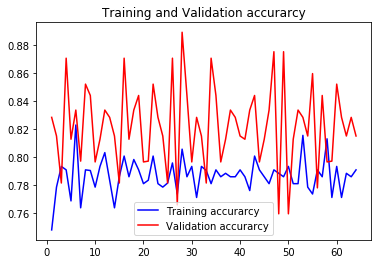

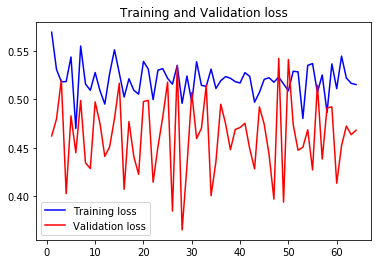

In [10]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

#Train and validation accuracy
plt.plot(epochs, acc, 'b', label='Training accurarcy')
plt.plot(epochs, val_acc, 'r', label='Validation accurarcy')
plt.title('Training and Validation accurarcy')
plt.legend()

plt.figure()
#Train and validation loss
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and Validation loss')
plt.legend()

plt.show()

In [11]:
predict = model.predict(X_val)
results = []
for x in predict: 
    if (x > .5):
        results.append(1)
    else:
        results.append(0)